# Introduction to the code
The following notebook contains the code use in the project. The code has the following sections:
1. Improting the libraries
2. Importing the main data
3. Looking at the main data
4. Data Cleaning and Preprocessing
5. Modelling
6. Importing the secodary data
7. Modelling


# 1. Importing the libraries

In [ ]:
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
nltk.download('punkt')
STOPWORDS.remove('not')

import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import MaxPooling1D, Conv1D, Flatten
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns


%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/MyDrive/SIC_Project_NLP')

# Importing the raw data

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')
df.rename({'review':'text', 'sentiment':'label'}, axis = 1, inplace = True)

In [ ]:
df.head(10)

,text,label
0,always write series complete stink fest jim be...,0
1,watch dir steve purcell typical mary kate ashl...,0
2,movie poorly write direct fell asleep minutes ...,0
3,interest thing miryang secret sunshine actors ...,1
4,first read berlin meer expect much think right...,0
5,saw film september indianapolis one judge hear...,1
6,saw screen movie last night high expectations ...,0
7,william hurt may not american matinee idol any...,1
8,piece crap not funny whole movie nothing ever ...,0
9,bout develop publish limit film pros absolutel...,0


# 2. Looking at the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
 1   label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [ ]:
#Checking for the missing values
null_columns=df.isnull().sum(axis=0)
null_columns

text     0
label    0
dtype: int64

1    25000
0    25000
Name: label, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


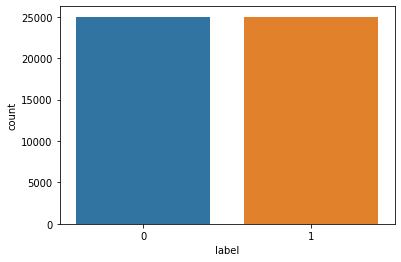

In [ ]:
#Checking if the dataset is balanced
%matplotlib inline
sns.countplot(df['label'])
print(df['label'].value_counts())

In [ ]:
#convrting pandas object to a string type
df['text'] = df['text'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
 1   label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


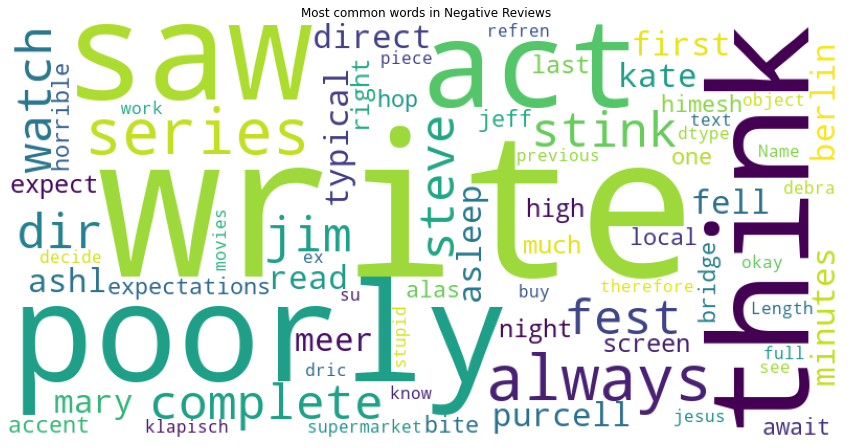

In [ ]:
# Word Cloud
import matplotlib as mpl
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
#mpl.rcParams['font.size']=12                #10 
#mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = list(STOPWORDS) +['movie']

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=5000, 
width=800, height=400,
                          random_state=123
                         ).generate(str(df[df.label == 0]['text']))

plt.figure(figsize=(15,10))
plt.title('Most common words in Negative Reviews')
plt.imshow(wordcloud)
plt.axis('off')
plt.show();



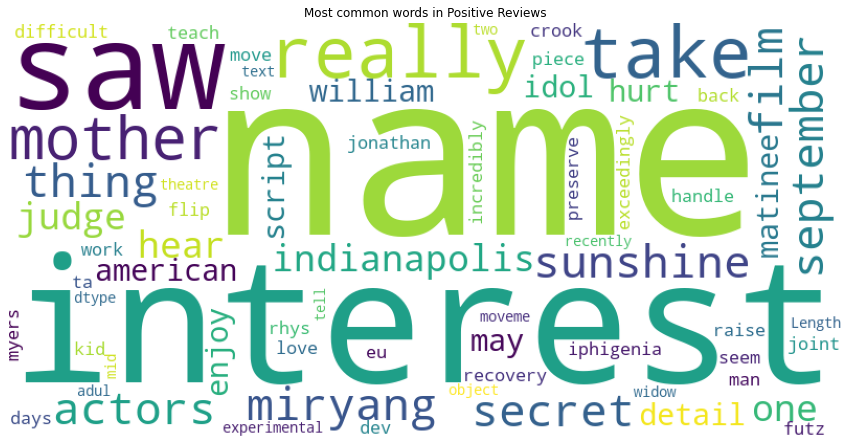

In [ ]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=5000, 
width=800, height=400,
                          random_state=123
                         ).generate(str(df[df.label == 1]['text']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title('Most common words in Positive Reviews')
plt.axis('off')
plt.show();

# 3. Data Cleaning and Preprocessing

In [ ]:
def Cleaning(text):
#Removing username
    text=re.sub('@[^\s]+', ' ',text)
#Removing URL
    text= re.sub('\w+:\/\/\S+', ' ',text)
#Removing non-alphabetic characters
    text= re.sub('[^A-Za-z \t]', ' ', text)
#Removing extra space
    text= re.sub('\s+', ' ', text)
#Removing the space at the beginning and the end
    text= text.strip()
    return text

def Normalization(text):
    stop_words= STOPWORDS
    lemma= WordNetLemmatizer() 
    text= tweet.lower()
#Tokenization
    text= word_tokenize(text)
#Removing the stop words
    text= [x for x in text if x not in stop_words]
#Lemmatization
    text= [lemma.lemmatize(word=w,pos='v') for w in text]
#Removing the words that have <= 2 characters
    text= [x for x in text if len(x)>2]
    text= ' '.join(text)
    return text

def pre_processing(text):
#Cleaning
    text = Cleaning(text)
#Normalization 
    text = Normalization(text)
    return text 

In [ ]:
#Starting the pre-processing
df['text']=df.text.apply(lambda x:pre_processing(x))
#Printing text after the pre-processing 
df

,text,label
0,always write series complete stink fest jim be...,0
1,watch dir steve purcell typical mary kate ashl...,0
2,movie poorly write direct fell asleep minutes ...,0
3,interest thing miryang secret sunshine actors ...,1
4,first read berlin meer expect much think right...,0
...,...,...
49995,man love movie really take back kid days teach...,1
49996,recovery incredibly move piece work handle dev...,1
49997,take crook joint seem exceedingly difficult ta...,1
49998,futz show preserve experimental theatre moveme...,1


In [ ]:
df.to_csv('Clean_IMDB_dataset.csv',index=False)

In [ ]:
# In case the user want to skip the preprocessing, this is the cleaned data ready to be used
df = pd.read_csv('Clean_IMDB_dataset.csv')

In [ ]:
num_words= 5000
max_len = 500
embedding_vecor_length = 64
tokenizer = Tokenizer(num_words=num_words, split=" ")
tokenizer.fit_on_texts(df['text'].values)

X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=max_len) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0, ..., 1721, 4971,  173],
       [   0,    0,    0, ..., 1296,    7,   95],
       [   0,    0,    0, ...,  341,    2,  662],
       [   0,    0,    0, ...,  878,  984,  409],
       [   0,    0,    0, ...,  613,  359,  467]], dtype=int32)

# 4. Modelling

In [ ]:
y = pd.get_dummies(df.label).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
model = Sequential()
model.add(Embedding(num_words, embedding_vecor_length, input_length=max_len))
model.add(Dropout(0.3))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(units=100)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 500, 64)           320000    
_________________________________________________________________
dropout_51 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 500, 32)           6176      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 250, 32)           0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 250, 32)           0         
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 200)               106400    
_________________________________________________________________
dropout_53 (Dropout)         (None, 200)             

In [ ]:
batch_size = 2048
epochs = 20

my_summary= model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose = 1, callbacks = [es])

Epoch 1/20
16/16 [==============================] - 8s 284ms/step - loss: 0.6929 - accuracy: 0.5084 - val_loss: 0.6880 - val_accuracy: 0.6521
Epoch 2/20
16/16 [==============================] - 4s 235ms/step - loss: 0.6712 - accuracy: 0.6551 - val_loss: 1.2650 - val_accuracy: 0.5023
Epoch 3/20
16/16 [==============================] - 4s 236ms/step - loss: 0.7845 - accuracy: 0.6711 - val_loss: 0.5764 - val_accuracy: 0.7906
Epoch 4/20
16/16 [==============================] - 4s 234ms/step - loss: 0.5189 - accuracy: 0.8196 - val_loss: 0.4073 - val_accuracy: 0.8282
Epoch 5/20
16/16 [==============================] - 4s 235ms/step - loss: 0.3605 - accuracy: 0.8586 - val_loss: 0.3348 - val_accuracy: 0.8631
Epoch 6/20
16/16 [==============================] - 4s 237ms/step - loss: 0.2842 - accuracy: 0.8941 - val_loss: 0.3080 - val_accuracy: 0.8750
Epoch 7/20
16/16 [==============================] - 4s 237ms/step - loss: 0.2509 - accuracy: 0.9089 - val_loss: 0.2977 - val_accuracy: 0.8815
Epoch 

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 23s 70ms/step - loss: 0.2964 - accuracy: 0.8841


[0.2964463531970978, 0.8841000199317932]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)).astype('float')
cm = cm/cm.sum(axis=1)

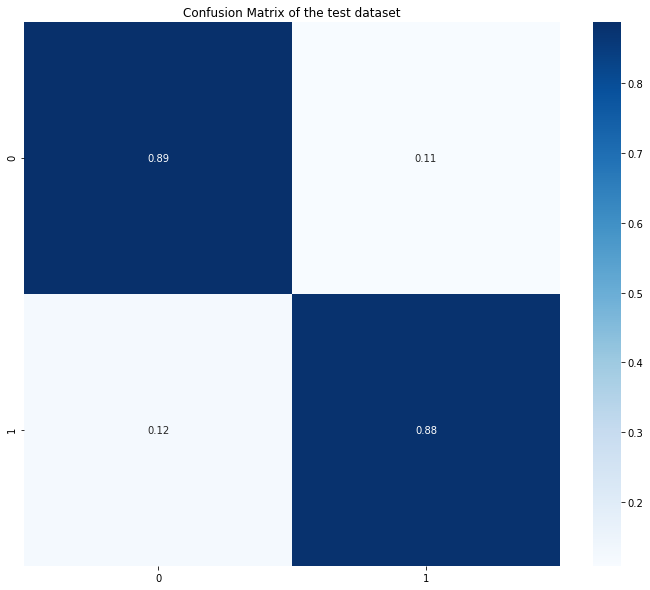

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(cm, annot = True , cmap = plt.cm.Blues);
plt.title('Confusion Matrix of the test dataset');

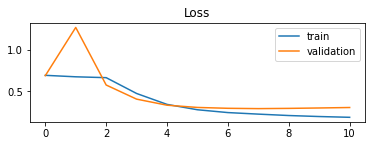

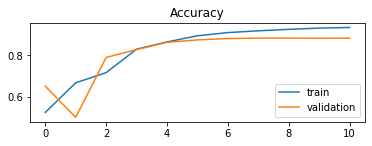

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(my_summary.history['loss'], label='train')
pyplot.plot(my_summary.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(my_summary.history['accuracy'], label='train')
pyplot.plot(my_summary.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

# 5. Importing Secodary Data

In [ ]:
f_df = pd.read_csv('Finance_data.csv',encoding='latin' , header = None)

In [ ]:
f_df.columns = ['label', 'text']

In [ ]:
f_df.head()

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
f_df[['label']].value_counts()

label   
neutral     2879
positive    1363
negative     604
dtype: int64

In [ ]:
f_df = f_df[f_df.label != 'negative']

In [ ]:
f_df['text']=f_df.text.apply(lambda x:pre_processing(x))
f_df.head()

,label,text
0,neutral,accord gran company plan move production russi...
1,neutral,technopolis plan develop stag area less square...
3,positive,new production plant company would increase ca...
4,positive,accord company update strategy years basware t...
5,positive,finance aspocomp growth aspocomp aggressively ...


In [ ]:
f_df=f_df.sample(frac=1.0)

In [ ]:
tokenizer = Tokenizer(num_words=num_words, split=" ")
tokenizer.fit_on_texts(f_df['text'].values)

X = tokenizer.texts_to_sequences(f_df['text'].values)
X = pad_sequences(X, maxlen=max_len) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0, ...,   67,   67,   52],
       [   0,    0,    0, ...,  280,  291,  154],
       [   0,    0,    0, ..., 3538,  668,   96],
       [   0,    0,    0, ...,   25,   37,    3],
       [   0,    0,    0, ...,   46,   50,   50]], dtype=int32)

In [ ]:
y = pd.get_dummies(f_df.label).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, )

In [ ]:
y_test.sum(axis = 0)

array([572, 277], dtype=uint64)

# 6. Modelling

In [ ]:
# To reuse the model, we need to save it and load again
model.save('final_model.h5')
model = load_model('final_model.h5')

In [ ]:
# Remove the last layer and new layers
loaded_model = load_model('final_model.h5')
loaded_model.pop()
loaded_model.add(Dense(10, activation='relu'))
loaded_model.add(Dropout(0.3))
loaded_model.add(Dense(2, activation='softmax'))
loaded_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 500, 64)           320000    
_________________________________________________________________
dropout_51 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 500, 32)           6176      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 250, 32)           0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 250, 32)           0         
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 200)               106400    
_________________________________________________________________
dropout_53 (Dropout)         (None, 200)             

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# First stage of trainin
my_summary_2= loaded_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose = 1,callbacks=[es])

Epoch 1/10
22/22 [==============================] - 25s 986ms/step - loss: 0.6531 - accuracy: 0.6511 - val_loss: 0.6261 - val_accuracy: 0.6907
Epoch 2/10
22/22 [==============================] - 22s 987ms/step - loss: 0.6234 - accuracy: 0.6735 - val_loss: 0.5959 - val_accuracy: 0.6907
Epoch 3/10
22/22 [==============================] - 21s 977ms/step - loss: 0.5606 - accuracy: 0.7001 - val_loss: 0.5792 - val_accuracy: 0.6996
Epoch 4/10
22/22 [==============================] - 21s 977ms/step - loss: 0.4845 - accuracy: 0.7642 - val_loss: 0.5691 - val_accuracy: 0.7187
Epoch 5/10
22/22 [==============================] - 21s 971ms/step - loss: 0.4101 - accuracy: 0.8224 - val_loss: 0.5823 - val_accuracy: 0.7378
Epoch 6/10
22/22 [==============================] - 21s 970ms/step - loss: 0.3286 - accuracy: 0.8666 - val_loss: 0.6603 - val_accuracy: 0.7467
Epoch 7/10
22/22 [==============================] - 22s 986ms/step - loss: 0.2812 - accuracy: 0.8928 - val_loss: 0.6417 - val_accuracy: 0.7541

In [ ]:
loaded_model.evaluate(X_test, y_test)

27/27 [==============================] - 2s 67ms/step - loss: 0.5819 - accuracy: 0.7668


[0.581913948059082, 0.7667844295501709]

In [ ]:
# Freezing the base model paramters
for i in range(6):
  loaded_model.layers[i].trainable = False

In [ ]:
# Second stage
my_summary_2= loaded_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose = 1,callbacks=[es])

Epoch 1/10
22/22 [==============================] - 22s 981ms/step - loss: 0.2123 - accuracy: 0.9230 - val_loss: 0.8046 - val_accuracy: 0.7629
Epoch 2/10
22/22 [==============================] - 21s 973ms/step - loss: 0.1774 - accuracy: 0.9348 - val_loss: 0.8201 - val_accuracy: 0.7820
Epoch 3/10
22/22 [==============================] - 21s 972ms/step - loss: 0.1452 - accuracy: 0.9528 - val_loss: 0.9028 - val_accuracy: 0.7747
Epoch 4/10
22/22 [==============================] - 22s 985ms/step - loss: 0.1212 - accuracy: 0.9635 - val_loss: 0.9722 - val_accuracy: 0.7570
Epoch 00004: early stopping


In [ ]:
loaded_model.evaluate(X_test, y_test)

27/27 [==============================] - 2s 67ms/step - loss: 0.8753 - accuracy: 0.7668


[0.8753257393836975, 0.7667844295501709]

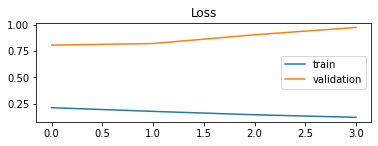

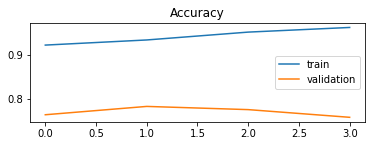

In [ ]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(my_summary_2.history['loss'], label='train')
pyplot.plot(my_summary_2.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(my_summary_2.history['accuracy'], label='train')
pyplot.plot(my_summary_2.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

In [ ]:
y_pred = loaded_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)).astype('float')
cm = cm/cm.sum(axis=1)

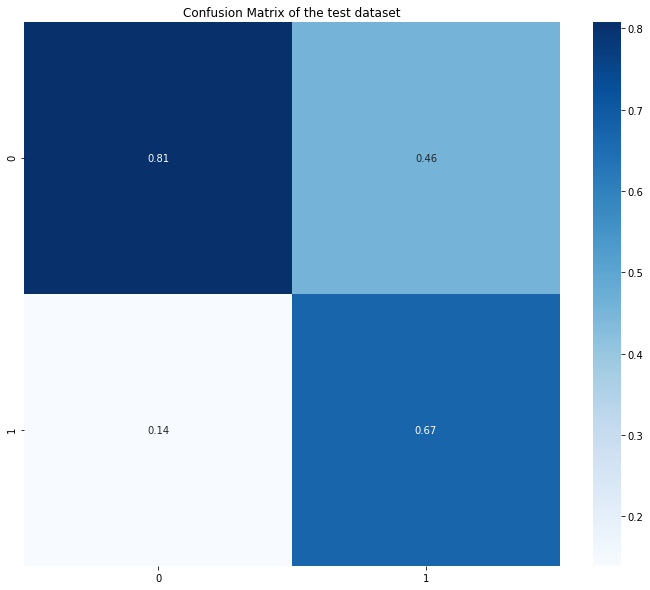

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(cm, annot = True , cmap = plt.cm.Blues);
plt.title('Confusion Matrix of the test dataset');

In [ ]:
# Unfreezing the parameters to save the second model without issues
for i in range(6):
  loaded_model.layers[i].trainable = True

In [ ]:
loaded_model.save('second_model.h5')

In [ ]:
loaded_model = load_model('second_model.h5')

In [ ]:
def classify_review(text):
  polarity = ['Negative', 'Positive']
  text = Cleaning(text)
  text = tokenizer.texts_to_sequences([text])
  text = pad_sequences(text, maxlen=max_len)
  pred = model.predict([text]).argmax(axis=1)[0]
  return polarity[pred]


In [ ]:
classify_review('very Good movie indeed')

'Positive'

In [ ]:
classify_review('This was one of the worst movies I have seen, I almost slept')

'Negative'